## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
# Tempolary data preparation and just use for build model 

In [5]:
df = df.drop(columns=['province', 'year'])

In [6]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.000000,39.000000,122.929870,1543.319740,74.789351,39.460260,14.781299,27.875455,1.358442,0.090000,1404.485714
std,1.416054,22.255032,30.138271,774.967638,4.380409,2.236733,3.899928,1.024079,2.354370,0.126734,1363.167218
min,1.000000,1.000000,75.000000,513.200000,63.900000,24.000000,0.600000,23.600000,0.000000,0.000000,62.000000
25%,2.000000,20.000000,101.000000,1023.500000,71.400000,37.900000,11.600000,27.300000,0.000000,0.000000,510.000000
50%,3.000000,39.000000,114.000000,1308.700000,74.300000,39.700000,14.800000,27.900000,1.000000,0.040000,938.000000
75%,4.000000,58.000000,141.000000,1794.900000,77.700000,41.200000,18.200000,28.600000,2.000000,0.140000,1821.000000
max,5.000000,77.000000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.300000,19.000000,0.880000,8279.000000


In [7]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [8]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [9]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
380,0.248276,0.094531,0.218009,0.855670,0.535088,0.402597,0.000000,0.000000
381,0.172414,0.147588,0.270142,0.953608,0.504386,0.480519,0.052632,0.045455
382,0.075862,0.120002,0.170616,0.979381,0.587719,0.636364,0.052632,0.193182
383,0.117241,0.060870,0.355450,0.953608,0.649123,0.694805,0.000000,0.000000
384,0.248276,0.226619,0.218009,0.855670,0.596491,0.493506,0.157895,0.159091


In [11]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [12]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [13]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,3.00,39.00,0.33,0.22,0.52,0.80,0.62,0.56,0.07,0.10,1404.49
std,1.42,22.26,0.21,0.16,0.21,0.12,0.17,0.13,0.12,0.14,1363.17
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00
25%,2.00,20.00,0.18,0.11,0.36,0.72,0.48,0.48,0.00,0.00,510.00
50%,3.00,39.00,0.27,0.17,0.49,0.81,0.62,0.56,0.05,0.05,938.00
75%,4.00,58.00,0.46,0.27,0.65,0.89,0.77,0.65,0.11,0.16,1821.00
max,5.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


##  Features selection for Linear Regression Model

In [14]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [15]:
X = df_pre[['year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]
y = df_pre['patient']

In [16]:
X_coe = X

In [17]:
X = np.array(X)

## Repeated k-Fold Cross-Validation


The scikit-learn Python machine learning library provides an implementation of repeated k-fold cross-validation via the RepeatedKFold class.

The main parameters are the number of folds (n_splits), which is the “k” in k-fold cross-validation, and the number of repeats (n_repeats).

A good default for k is k=10.

A good default for the number of repeats depends on how noisy the estimate of model performance is on the dataset. A value of 3, 5, or 10 repeats is probably a good start. More repeats than 10 are probably not required.

In [18]:
from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45) #Test 5Folds, 3Repeats

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
        
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  0   1   2   5   6   7   8   9  11  12  13  14  15  16  17  18  19  21
  22  23  24  26  27  28  29  30  31  32  34  35  36  37  39  40  41  42
  43  44  46  47  48  49  51  53  54  55  56  57  58  59  60  62  64  65
  66  67  68  70  71  74  75  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  97  98 100 101 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 127
 130 131 133 134 135 136 137 138 140 142 143 144 146 147 148 150 151 152
 153 154 155 156 158 160 161 162 163 164 165 167 169 172 173 174 175 176
 177 178 179 181 182 183 184 185 186 187 188 189 190 191 193 194 196 197
 198 199 201 203 204 205 206 207 208 209 210 211 212 213 215 216 217 218
 219 220 223 224 226 228 229 230 231 232 233 234 235 236 237 239 241 242
 243 244 246 247 248 250 251 253 254 255 256 258 259 261 262 263 264 265
 267 268 269 270 272 273 274 276 277 278 280 281 282 283 286 287 288 292
 293 295 298 300 301 302 303 304 305 306 307

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# use simple model: Linear Regression.
lm = LinearRegression()

In [23]:
# fit the model
lm.fit(X_train, y_train)    

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [24]:
# print the intercept
print(lm.intercept_)

468.1813117288724


In [25]:
# create Data Frame 
# Data is lm.coef_
# labal is name of X.columns
# Column is'Coefficient'

coeff_df = pd.DataFrame(lm.coef_ , X_coe.columns , columns=['Coefficient'])
coeff_df

,Coefficient
year_num,73.794047
province_num,-2.666669
day_raindrop,243.482145
quant_rain,-330.609709
humbidity_perc,182.357544
temp_max,533.567485
temp_min,252.659619
temp_avg,-332.252526
dead,9045.694472
dead_perc,-3614.000666


## Predictions from our Model

In [26]:
# Predicting 
predictions = lm.predict(X_test)

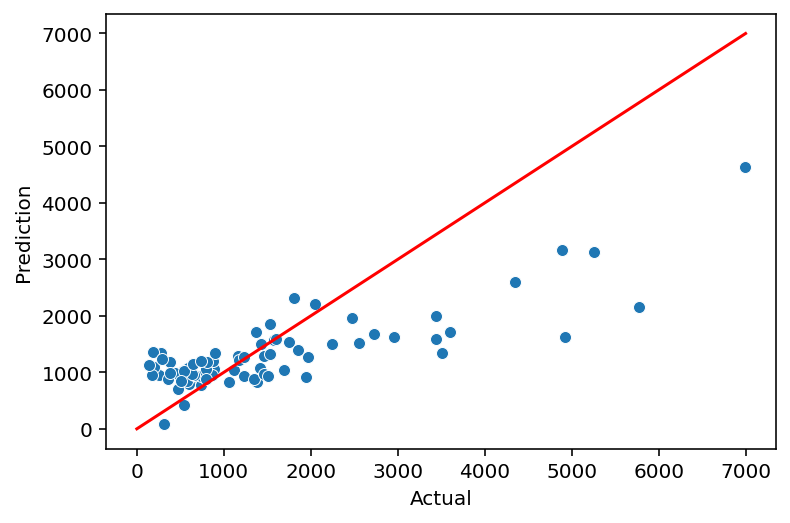

In [31]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line
x_plot = np.linspace(0,7000,10000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

### Actual value and the predicted value

In [28]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
3,1420,1079.696671
4,669,910.485076
12,1692,1043.952125
19,802,964.573248
25,530,1025.340420
26,255,945.906567
27,1969,1271.121820
30,1942,922.884244
41,1117,1045.561143
51,1387,821.303973


**Residual Histogram**

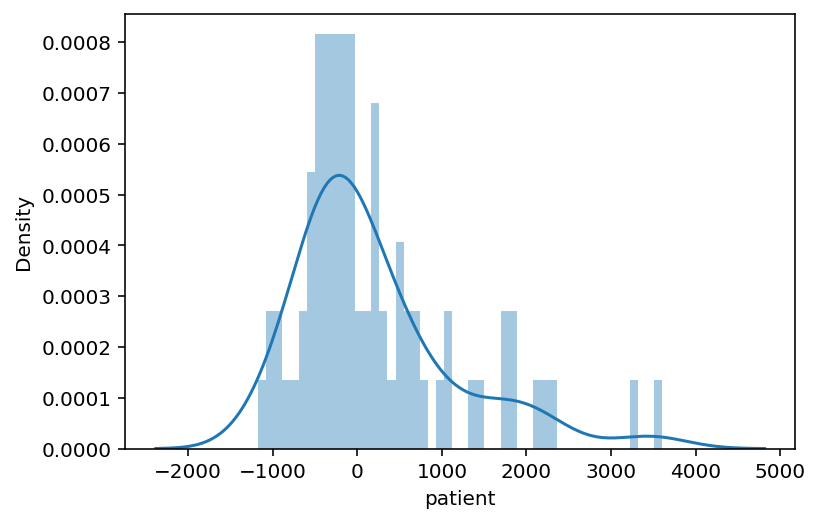

In [29]:
sns.distplot((y_test-predictions),bins=50)
plt.show()

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [30]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)))
print('R squared of Test Set: {:.2f}'.format(lm.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.57
R squared of Test Set: 0.52
Mean Absolute Error (MAE): 671.3239
Root Mean Squared Error (RMSE): 975.6791
